Accuracy: 0.9647
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      1997
           1       0.47      0.11      0.18        72

    accuracy                           0.96      2069
   macro avg       0.72      0.55      0.58      2069
weighted avg       0.95      0.96      0.95      2069

   age  job  marital  education  default  balance  housing  loan  contact  \
0   58    4        1          2        0     2143        1     0        0   
1   44    9        2          1        0       29        1     0        0   
2   33    2        1          1        0        2        1     1        0   
3   47    1        1          3        0     1506        1     0        0   
4   33   11        2          3        0        1        0     0        0   

   day  month  duration  campaign  pdays  previous  poutcome  y  \
0  5.0      1     261.0       1.0   -1.0       0.0         0  0   
1  5.0      1     151.0       1.0  

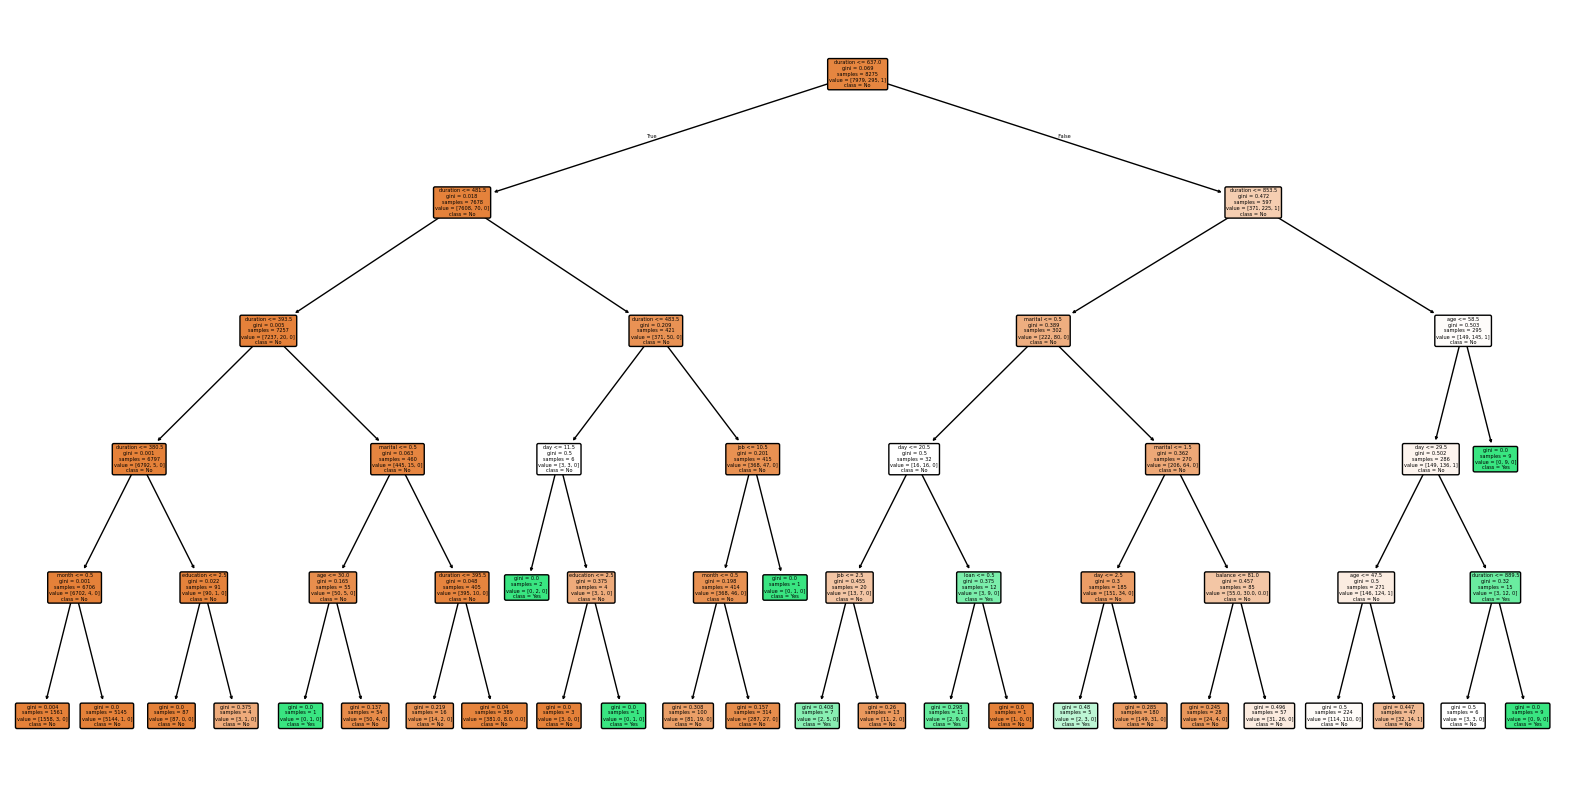

'decision_tree.pdf'

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
from sklearn.metrics import accuracy_score, classification_report
import graphviz

# Load dataset
df = pd.read_csv("/content/bank-full.csv", sep=";")

# Preprocessing: Convert categorical variables to numerical using Label Encoding
label_encoders = {}
categorical_cols = df.select_dtypes(include=['object']).columns
for column in categorical_cols:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le  # Store encoders for potential inverse transform

# Define features (X) and target (y)
X = df.drop(columns=["y"])  # Features
y = df["y"]  # Target

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42, max_depth=5)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:\n", report)

# --- Prediction Function ---
def predict_purchase(customer_data):
    """Predicts whether a customer will purchase (1) or not (0).

    Args:
        customer_data (dict or pandas Series): A dictionary or pandas Series
                                             containing customer features.

    Returns:
        int: 1 if purchase is predicted, 0 otherwise.
    """
    # Create a DataFrame with all columns from the training data
    customer_df = pd.DataFrame([customer_data], columns=X_train.columns)

    # Fill missing values with 0 (or another appropriate value)
    customer_df = customer_df.fillna(0)

    # Convert categorical features in customer_data using saved encoders
    for col in customer_data.index if isinstance(customer_data, pd.Series) else customer_data:
        if col in label_encoders and col in customer_df.columns and not isinstance(customer_data[col], (int, float)):
            le = label_encoders[col]
            try:
                customer_df[col] = le.transform(customer_df[col])
            except ValueError:
                most_frequent_value = X_train[col].mode()[0]
                customer_df[col] = most_frequent_value

    # Make prediction
    prediction = clf.predict(customer_df)[0]
    return prediction

# Apply prediction to the entire dataset
df['purchase_prediction'] = df.apply(predict_purchase, axis=1)

# Display the DataFrame with predictions
print(df.head())

# --- Decision Tree Visualization ---
plt.figure(figsize=(20, 10))
plot_tree(clf, feature_names=X.columns, class_names=["No", "Yes"], filled=True, rounded=True)
plt.show()

# --- Export Decision Tree as Graph ---
dot_data = export_graphviz(clf, out_file=None,
                           feature_names=X.columns,
                           class_names=["No", "Yes"],
                           filled=True, rounded=True, special_characters=True)

# Render tree
graph = graphviz.Source(dot_data)
graph.render("decision_tree")  # Saves as a file
graph.view()  # Opens the file for viewing
